<a href="https://colab.research.google.com/github/RishithaAkbote/Netflix/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_netflix = pd.read_csv('/content/drive/MyDrive/netflix.csv')
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#length of data
len(df_netflix)

8807

In [ ]:
df_netflix.ndim

2

In [ ]:
#Checking data types
df_netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
df_netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
#Missing value
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df_netflix.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [ ]:
df_netflix.director.fillna("No Director", inplace=True)
df_netflix.cast.fillna("No Cast", inplace=True)
df_netflix.country.fillna("Country Unavailable", inplace=True)
df_netflix.dropna(subset=["date_added", "rating"], inplace=True)


In [ ]:
#Checking Missing values
df_netflix.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration         True
listed_in       False
description     False
dtype: bool

In [ ]:
type_counts = df_netflix['type'].value_counts()
print("Value counts for 'type':")
print(type_counts)

Value counts for 'type':
type
Movie      6129
TV Show    2664
Name: count, dtype: int64


In [ ]:
# Value counts for 'rating'
rating_counts = df_netflix['rating'].value_counts()
print("\nValue counts for 'rating':")
print(rating_counts)


Value counts for 'rating':
rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [ ]:
# Value counts for 'country'
country_counts = df_netflix['country'].value_counts()
print("\nValue counts for 'country':")
print(country_counts)


Value counts for 'country':
country
United States                             2812
India                                      972
Country Unavailable                        829
United Kingdom                             418
Japan                                      243
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64


In [ ]:
# Value counts for 'listed_in' (genres)
listed_in_counts = df_netflix['listed_in'].value_counts()
print("\nValue counts for 'listed_in':")
print(listed_in_counts)


Value counts for 'listed_in':
listed_in
Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                334
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International TV Shows, TV Horror, TV Sci-Fi & Fantasy           1
Crime TV Shows, Kids' TV                                         1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Cult Movies, Dramas, Thrillers                                   1
Name: count, Length: 513, dtype: int64


In [ ]:
# Unique values for 'type'
unique_types = df_netflix['type'].nunique()
print("Number of unique values in 'type':", unique_types)

Number of unique values in 'type': 2


In [ ]:
# Unique values for 'rating'
unique_ratings = df_netflix['rating'].nunique()
print("Number of unique values in 'rating':", unique_ratings)

Number of unique values in 'rating': 17


In [ ]:
# Unique values for 'country'
unique_countries = df_netflix['country'].nunique()
print("Number of unique values in 'country':", unique_countries)

Number of unique values in 'country': 749


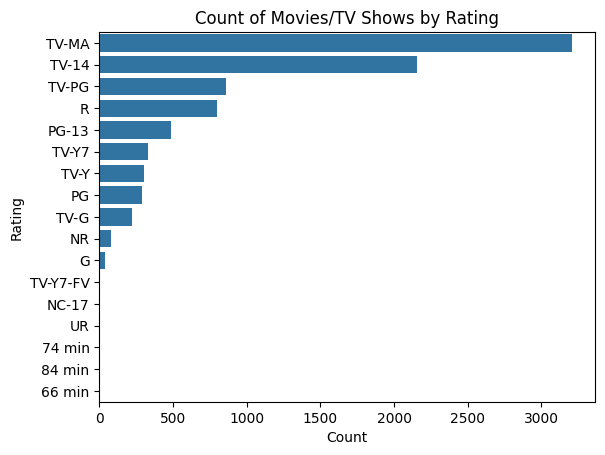

In [ ]:
# Countplot for ratings
sns.countplot(y='rating', data=df_netflix, order=df_netflix['rating'].value_counts().index)
plt.title('Count of Movies/TV Shows by Rating')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

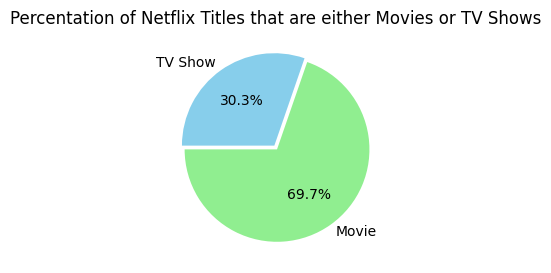

In [ ]:
plt.figure(figsize=(6,3))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
g=plt.pie(df_netflix.type.value_counts(),explode=(0.025,0.025),
labels=df_netflix.type.value_counts().index, colors=['lightgreen','skyblue'],autopct='%1.1f%%',
startangle=180)
plt.show()

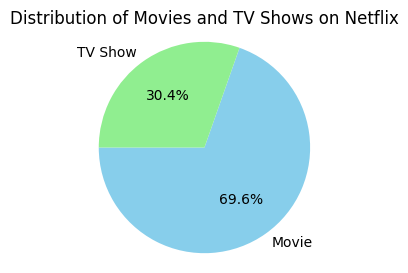

In [ ]:
# Count the number of movies and TV shows
type_counts = df_netflix['type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(3, 3))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=180, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

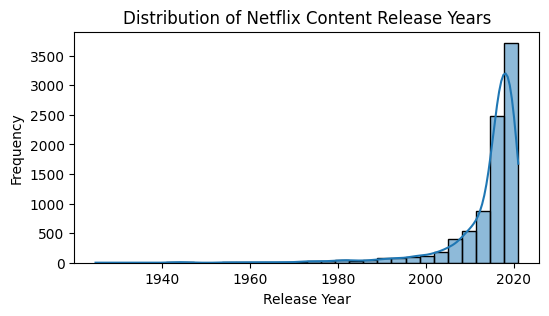

In [ ]:
# Set the plot size
plt.figure(figsize=(6, 3))

# Distplot for release year
sns.histplot(df_netflix['release_year'], bins=30, kde=True)

# Set the title and labels
plt.title('Distribution of Netflix Content Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

<Figure size 600x400 with 0 Axes>

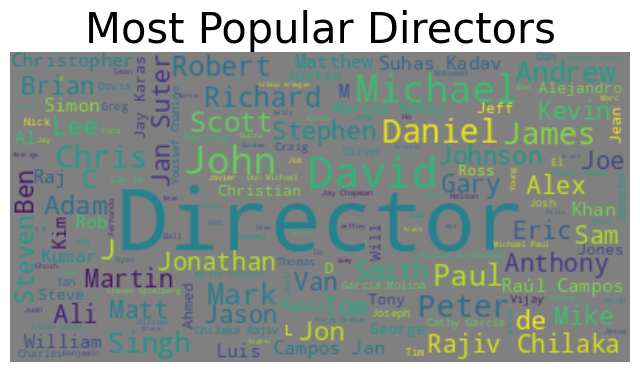

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df_netflix.director)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="gray").generate(text)
plt.figure(figsize=(6,4))
plt.figure(figsize=(8,6))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.title('Most Popular Directors',fontsize = 30)
plt.axis("off")
plt.show()



<ipython-input-21-ab34c8adf571>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_20_genres, x='Count', y='Genre', palette='viridis')


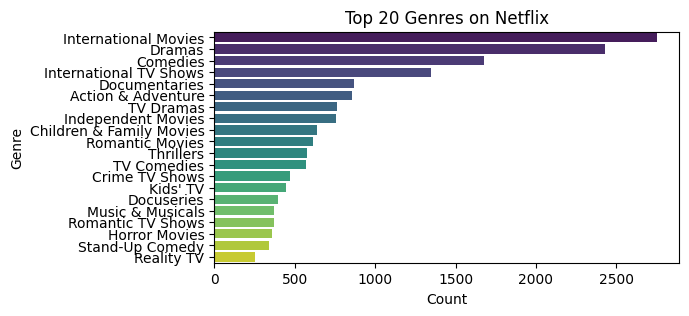

In [ ]:
from collections import Counter
# Split the 'listed_in' column to get individual genres
genres = df_netflix['listed_in'].str.split(',').apply(lambda x: [genre.strip() for genre in x])

# Flatten the list of genres
all_genres = [genre for sublist in genres for genre in sublist]

# Count the occurrences of each genre
genre_counts = Counter(all_genres)

# Get the top 20 genres
top_20_genres = genre_counts.most_common(20)

# Create a DataFrame for the top 20 genres
df_top_20_genres = pd.DataFrame(top_20_genres, columns=['Genre', 'Count'])

# Plot a count plot for the top 20 genres
plt.figure(figsize=(6, 3))
sns.barplot(data=df_top_20_genres, x='Count', y='Genre', palette='viridis')
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

<ipython-input-22-45ce9ec83328>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies_df['duration'] = netflix_movies_df['duration'].str.extract('(\d+)').astype(float)


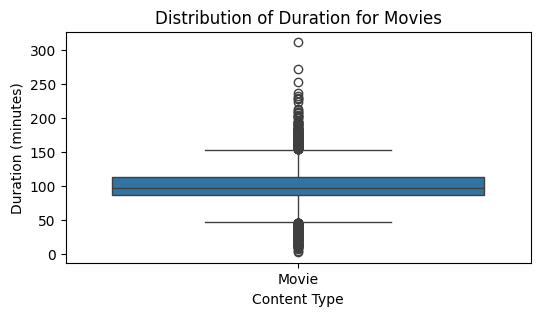

In [ ]:
# Filter the dataset for movies
netflix_movies_df = df_netflix[df_netflix['type'] == 'Movie']

# Extract the duration in minutes, handle missing values
netflix_movies_df['duration'] = netflix_movies_df['duration'].str.extract('(\d+)').astype(float)
netflix_movies_df = netflix_movies_df.dropna(subset=['duration'])

# Create a boxplot for movie duration
plt.figure(figsize=(6, 3))
sns.boxplot(data=netflix_movies_df, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration (minutes)')
plt.title('Distribution of Duration for Movies')
plt.show()

<ipython-input-32-f1402535ddde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_tvshows_df['duration'] = netflix_tvshows_df['duration'].str.extract('(\d+)').astype(int)


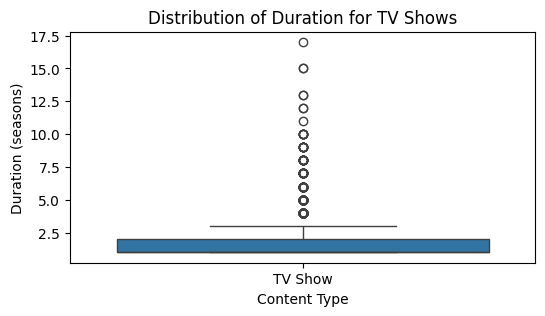

In [ ]:
# Filter the dataset for TV shows and extract the number of seasons
netflix_tvshows_df = df_netflix[df_netflix['type'] == 'TV Show']
netflix_tvshows_df['duration'] = netflix_tvshows_df['duration'].str.extract('(\d+)').astype(int)

# Creating a boxplot for TV show duration (seasons)
plt.figure(figsize=(6, 3))
sns.boxplot(data=netflix_tvshows_df, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration (seasons)')
plt.title('Distribution of Duration for TV Shows')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

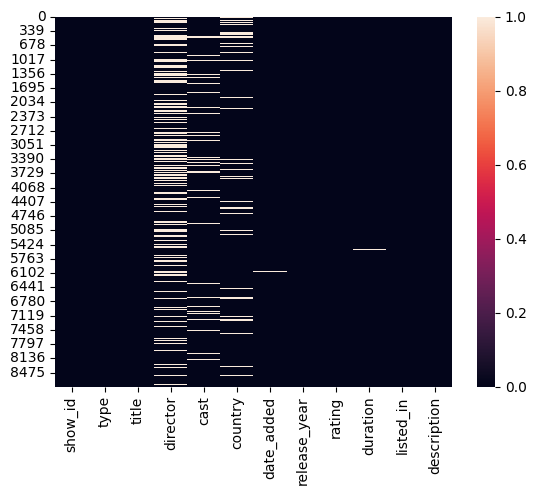

In [ ]:
sns.heatmap(df_netflix.isnull())
plt.show

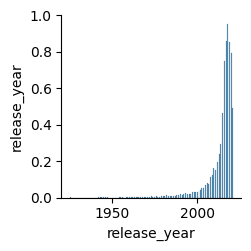

In [ ]:
sns.pairplot(df_netflix)

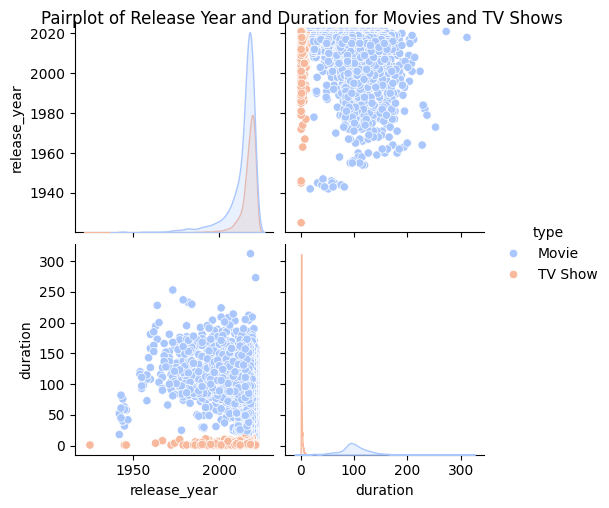

In [ ]:
# Convert the duration to numeric values if not already done
df_netflix['duration'] = df_netflix['duration'].astype(str).str.extract('(\d+)', expand=False).astype(float)

# Create the pairplot with relevant variables
sns.pairplot(df_netflix, vars=['release_year', 'duration'], hue='type', palette='coolwarm')
plt.suptitle('Pairplot of Release Year and Duration for Movies and TV Shows', y=1.00)
plt.show()

In [ ]:
#Number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [ ]:
#checking all the null values in every coloum of our data
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#Checking the occurence of each of the ratings
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [ ]:
con1 = df['director'].apply(lambda x: str(x).split(', ')). tolist()